## Материалы
* [Презентация](https://drive.google.com/file/d/12wnQEZhrfzgMINYCBOp_FEzG57nlkFcv/view?usp=sharing)
* [Дашборд](https://public.tableau.com/app/profile/daria.buss/viz/Dashbord_16873797842540/sheet24?publish=yes)

## Загрузка и обзор данных

Выгрузим данные о банке "Метанпромбанк" из csv-файла в датафрейм и сохраним его в переменной `bank`.

In [1]:
!pip install phik

     |████████████████████████████████| 679 kB 1.0 MB/s eta 0:00:01


In [2]:
# загружаем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as st

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [3]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную `bank`
try:
    path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
    bank = pd.read_csv(path)
except FileNotFoundError:
    display('Такого файла не существует!')

Выведем 10 строчек датафрейма `bank` на экран.

In [4]:
bank.sample(10)

USERID  score       city gender   age  equity     balance  products  \
1831  214857  837.0    Рыбинск      Ж  33.0       2  1234570.87         2   
6950  151031  786.0     Ростов      М  50.0       4   390588.04         2   
9057  189467  889.0  Ярославль      Ж  69.0       0         NaN         1   
1478  164710  891.0  Ярославль      Ж  47.0       5   793618.24         3   
2606  135021  859.0     Ростов      Ж  50.0       3   428604.54         2   
7389  177165  840.0  Ярославль      М  36.0       4  1374885.22         3   
8164  124450  859.0  Ярославль      Ж  38.0       6   516811.20         1   
2986  218031  849.0  Ярославль      М  51.0       3   974774.91         2   
2510  133034  755.0  Ярославль      Ж  53.0       2   388176.01         3   
3972  210373  911.0    Рыбинск      Ж  62.0       0         NaN         1   

      credit_card  last_activity  EST_SALARY  churn  
1831            0              1   145901.34      0  
6950            1              1    78913.99      0  
9057            1              0    68522.49      0  
1478            0              0   136373.65      0  
2606            0              0   115615.67      0  
7389            0              1   183578.73      0  
8164            1              1    95144.63      1  
2986            1              0   181232.05      1  
2510            0              1    45952.85      0  
3972            1              0   288437.42      0

**Таблица содержит следующую информацию:**
- `USERID` - идентификатор пользователя;
- `score` - баллы кредитного скоринга;
- `city` - город;
- `gender` - пол;
- `age` - возраст;
- `equity` - количество баллов собственности;
- `balance` - баланс на счёте;
- `products` - количество продуктов, которыми пользуется клиент;
- `credit_card` - есть ли кредитная карта;
- `last_activity` - активный клиент;
- `EST_SALARY` - заработная плата клиента;
- `churn` - ушёл или нет.

Выведем основную информацию о датафрейме.

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Таблица с исходными данными содержит 12 столбцов и 10000 строк. Обратим внимание, что в столбцах `age` и `balance` имеются пропущенные значения.

In [6]:
bank.describe()

USERID         score          age        equity       balance  \
count   10000.00000  10000.000000  9974.000000  10000.000000  7.705000e+03   
mean   171814.71260    848.699400    42.734409      2.627600  8.277943e+05   
std     33708.23812     65.448519    12.179971      1.980836  1.980614e+06   
min     94561.00000    642.000000    18.000000      0.000000  0.000000e+00   
25%    142810.25000    802.000000    33.000000      0.000000  2.955542e+05   
50%    172728.00000    853.000000    40.000000      3.000000  5.242722e+05   
75%    201261.75000    900.000000    51.000000      4.000000  9.807058e+05   
max    229145.00000   1000.000000    86.000000      9.000000  1.191136e+08   

           products   credit_card  last_activity    EST_SALARY         churn  
count  10000.000000  10000.000000   10000.000000  1.000000e+04  10000.000000  
mean       1.870100      0.680400       0.523500  1.478669e+05      0.182000  
std        0.792647      0.466345       0.499472  1.393885e+05      0.385864  
min        0.000000      0.000000       0.000000  2.546300e+03      0.000000  
25%        1.000000      0.000000       0.000000  7.525190e+04      0.000000  
50%        2.000000      1.000000       1.000000  1.196581e+05      0.000000  
75%        2.000000      1.000000       1.000000  1.745005e+05      0.000000  
max        5.000000      1.000000       1.000000  1.395064e+06      1.000000

В исходных данных нет отрицательных значений. Обратим внимание на аномально-минимальные и максимальные значения столбцов `balance` и `EST_SALARY`, а также на минимальное значение столбца `products`.

Построим общую гистограмму для всех числовых столбцов таблицы.

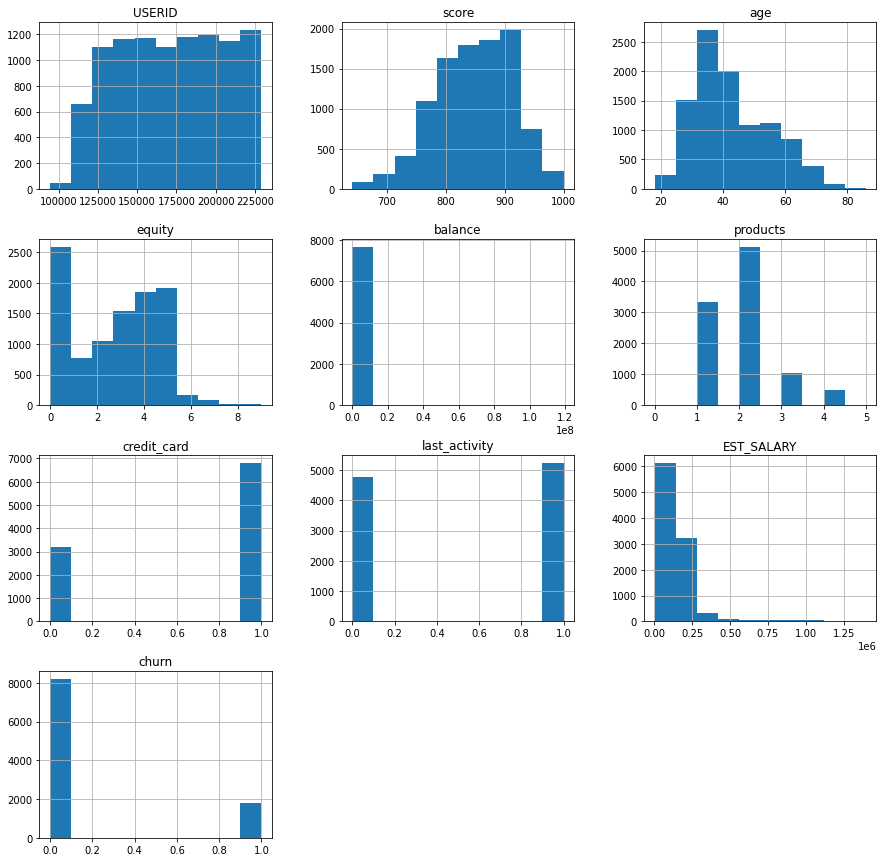

In [7]:
bank.hist(figsize=(15, 15));

## Предобработка данных

### Замена названия столбцов

Приведем названия столбцов к нижнему регистру.

In [8]:
bank.columns = bank.columns.str.lower()

In [9]:
# check
bank.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Теперь переименуем столбец `userid` на `user_id`.

In [10]:
bank = bank.rename(columns={'userid': 'user_id'})

In [11]:
# check
bank.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Обработка дубликатов

Проверим наши данные на наличие дубликатов.

In [12]:
bank.duplicated().sum()

0

В исходных данных не строк-дубликатов.

Обратим внимание на столбец `user_id` - идентификатор пользователя. Проверим, все ли идентификаторы пользователей являются уникальными.

In [13]:
bank['user_id'].duplicated().sum()

73

В наших данных есть 73 клиента с повторяющимся идентификатором пользователя. Посмотрим на данные этих клиентов.

In [14]:
bank[bank['user_id'].duplicated()].describe()

user_id       score        age     equity       balance  \
count      73.000000   73.000000  51.000000  73.000000  3.800000e+01   
mean   182100.219178  843.726027  43.745098   1.671233  6.043808e+05   
std     33958.146205   72.949233  12.829409   1.972412  3.873457e+05   
min    116540.000000  663.000000  22.000000   0.000000  7.357407e+04   
25%    152479.000000  790.000000  34.000000   0.000000  3.386941e+05   
50%    187635.000000  839.000000  42.000000   0.000000  4.771945e+05   
75%    210898.000000  909.000000  48.000000   3.000000  8.692285e+05   
max    228075.000000  949.000000  77.000000   7.000000  1.598219e+06   

        products  credit_card  last_activity     est_salary  churn  
count  73.000000    73.000000      73.000000      73.000000   73.0  
mean    1.671233     0.753425       0.520548  144530.884384    0.0  
std     0.727530     0.434000       0.503035  143382.631840    0.0  
min     1.000000     0.000000       0.000000   28843.540000    0.0  
25%     1.000000     1.000000       0.000000   75409.630000    0.0  
50%     2.000000     1.000000       1.000000  119106.670000    0.0  
75%     2.000000     1.000000       1.000000  160368.820000    0.0  
max     3.000000     1.000000       1.000000  922080.250000    0.0

Обратим внимание на столбец `churn`, все клиенты с повторяющимся идентификатором пользователя не являются отточными. Поскольку нас интересует информация в разрезе оттока, если мы удалим клиентов с повторяющимся идентификатором пользователя (количество таких клиентов 0,73% от исходного датафрема), это не повлияет на наше дальнейшее исследование. Удалим строки-дубликаты в столбце `user_id`.

In [15]:
bank = bank.drop_duplicates(subset=['user_id']).reset_index(drop=True)

In [16]:
# check
bank['user_id'].duplicated().sum()

0

В исходных данных нет клиентов с повторяющимся идентификатором пользователя.

### Кодирование столбцов (пол, город)

Изучим значения столбцов `gender` и `city`.

In [17]:
display(bank.gender.unique())
display(bank.city.unique())

array(['Ж', 'М'], dtype=object)

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Значения этих столбцов относятся к категориальным неупорядоченным данным. Для того, чтобы применять среднее и смотреть корреляции числовых показателей со столбцами `gender` и `city`, необходимо их закодировать. В качестве кодировщика используем тип кодирования - `One-Hot Encoder`.

In [18]:
# создадим копию столбца "gender"
gender = bank['gender'].copy()

# используем метод get_dummies() для кодирования копии столбца "gender"
encoded_gender = pd.get_dummies(gender, prefix='gender')

# объединим исходный датафрейм "bank" и закодированный датафрейм "encoded_gender"
bank = pd.concat([bank, encoded_gender], axis=1)

bank.sample(5)

user_id  score       city gender   age  equity    balance  products  \
607    190468  810.0  Ярославль      М  42.0       0   50468.80         2   
454    122296  881.0    Рыбинск      М  55.0       0        NaN         1   
1304   157084  653.0    Рыбинск      М  53.0       0        NaN         2   
1691   151170  853.0  Ярославль      Ж  27.0       3  178810.04         4   
6212   171214  813.0  Ярославль      Ж  44.0       3  467893.14         1   

      credit_card  last_activity  est_salary  churn  gender_Ж  gender_М  
607             1              0   214923.01      0         0         1  
454             0              0    94752.11      0         0         1  
1304            1              0    72345.06      0         0         1  
1691            0              1    25673.29      0         1         0  
6212            1              0   179539.23      0         1         0

Аналогичным образом закодируем столбец `city`.

In [19]:
 # создадим копию столбца "city"
city = bank['city'].copy()

# используем метод get_dummies() для кодирования копии столбца "city"
encoded_city = pd.get_dummies(city, prefix='city')

# объединим исходный датафрейм "bank" и закодированный датафрейм "encoded_gender"
bank = pd.concat([bank, encoded_city], axis=1)

bank.sample(5)

user_id  score       city gender   age  equity     balance  products  \
9311   159480  920.0    Рыбинск      М  32.0       0         NaN         1   
5583   129715  800.0    Рыбинск      Ж  57.0       5  1631178.72         3   
9142   219826  895.0     Ростов      Ж  39.0       5  1338240.88         2   
6701   193751  832.0  Ярославль      Ж  36.0       4   430992.74         2   
8870   200877  865.0    Рыбинск      М  42.0       3   965148.21         2   

      credit_card  last_activity  est_salary  churn  gender_Ж  gender_М  \
9311            0              1   119794.34      0         0         1   
5583            1              0    95896.63      0         1         0   
9142            0              0    97501.61      0         1         0   
6701            1              0    43673.90      0         1         0   
8870            1              1   346953.52      0         0         1   

      city_Ростов  city_Рыбинск  city_Ярославль  
9311            0             1               0  
5583            0             1               0  
9142            1             0               0  
6701            0             0               1  
8870            0             1               0

Заменим названия закодированных столбцов.

In [20]:
bank = bank.rename(columns={'gender_Ж': 'female', 
                            'gender_М': 'male',
                            'city_Ростов': 'Rostov',
                            'city_Рыбинск': 'Rybinsk',
                            'city_Ярославль': 'Yaroslavl'})

bank.sample(5)

user_id  score       city gender   age  equity     balance  products  \
4156   115668  856.0  Ярославль      М  46.0       2   864225.32         2   
7242   147957  805.0     Ростов      М  46.0       4  1021937.67         2   
3544   153710  869.0  Ярославль      Ж  40.0       4   427183.28         2   
7034   198094  870.0  Ярославль      М  46.0       5  1369932.88         2   
4154   114211  834.0  Ярославль      Ж  28.0       2   266759.99         2   

      credit_card  last_activity  est_salary  churn  female  male  Rostov  \
4156            1              0    86489.40      0       0     1       0   
7242            1              0   150525.12      0       0     1       1   
3544            0              0   165985.49      0       1     0       0   
7034            1              0   251670.95      1       0     1       0   
4154            1              0   100412.37      0       1     0       0   

      Rybinsk  Yaroslavl  
4156        0          1  
7242        0          0  
3544        0          1  
7034        0          1  
4154        0          1

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца.

In [21]:
bank.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 4
equity              0
balance          2260
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
female              0
male                0
Rostov              0
Rybinsk             0
Yaroslavl           0
dtype: int64

В столбце `age` 4 пропущенных значений, так как их очень мало удаление этих строк не повлияет на наше дальнейшее исследование. Удалим строки с пропусками в столбце `age`.

In [22]:
bank = bank.dropna(subset=['age'])

In [23]:
# check
bank.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2260
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
female              0
male                0
Rostov              0
Rybinsk             0
Yaroslavl           0
dtype: int64

В столбце `balance` большое количество пропущенных значений - 2260 значений, поэтому нам необходимо их исследовать и постараться установить их тип, чтобы понять, можем ли мы заполнить пропуски, и если можем, то понять, как лучше это сделать. Для этого сравним типичного клиента без пропущенных значений в столбце `balance` и с пропущенными значениями. 

In [24]:
# срез данных без пропущенных значений
without_missing_values = bank.query('balance == balance').mean().round(2) 
without_missing_values

user_id          171659.49
score               843.84
age                  42.91
equity                3.40
balance          828248.16
products              2.08
credit_card           0.64
last_activity         0.52
est_salary       124642.36
churn                 0.24
female                0.52
male                  0.48
Rostov                0.15
Rybinsk               0.27
Yaroslavl             0.57
dtype: float64

In [25]:
# срез данных с пропущенными значениями
with_missing_values = bank.query('balance != balance').mean().round(2)
with_missing_values

user_id          171975.57
score               865.33
age                  42.13
equity                0.05
balance                NaN
products              1.16
credit_card           0.82
last_activity         0.55
est_salary       226700.56
churn                 0.01
female                0.44
male                  0.56
Rostov                0.10
Rybinsk               0.25
Yaroslavl             0.64
dtype: float64

Средние значения типичного клиента без пропусков в переменной `without_missing_values` не сильно отличаются от клиента в переменной `with_missing_values`. У пользователей с пропусками, мы видим более низкие значения столбцов `equity` - количество баллов собственности и `products` - количество продуктов, а значения столбца `est_salary` - заработная плата клиента - выше. Посмотрим на значение корреляции между срезами данных `without_missing_values` и `with_missing_values`.

In [27]:
bank.assign(bal_nan = bank.balance.isna()).corr()['bal_nan']\
    .drop('bal_nan').sort_values(key=abs,ascending=False).head(10)

equity        -0.708601
products      -0.486189
est_salary     0.307136
churn         -0.249216
credit_card    0.157695
score          0.137872
female        -0.062988
male           0.062988
Rostov        -0.060114
Yaroslavl      0.056541
Name: bal_nan, dtype: float64

Исходя из полученных данных о коэффициентах корреляции с пропусками, мы можем предположить, что пропуски в столбце `balance` могут быть случайными (MAR) и не иметь явной связи с другими столбцами. Это может быть вызвано ошибками ввода данных или техническими проблемами при сборе информации. Также значения корреляции с пропусками могут указывать на наличие других скрытых факторов или влияние других переменных, которых нет в данных (MNAR). Так как мы не имеем доступа к информации о том, как собирались данные, мы не можем точно определить к какой категории относятся наши пропуски. Если мы отбросим строки с пропусками, то потеряем большое количество данных, которые нам понадобятся для дальнейшего анализа, а если попытаемся их заполнить синтетическими данными, то это может исказить результаты нашего исследования. Оставим пропущенные значения в столбце `balance` без изменений.

### Обработка аномальных значений

Посмотрим на столбцы с числовыми данными - `balance` и `est_salary`.

In [29]:
# посмотрим на минимальные и максимальные значения
(
    bank[['balance', 'est_salary']]
    .apply(['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

In [30]:
# посмотрим на перцентили
(
    bank[['balance', 'est_salary']]
    .quantile([0.01, .5, .90, .99]) 
    .style.format("{:,.2f}")
)

Изучим данные столбца `balance` - баланс на счёте.

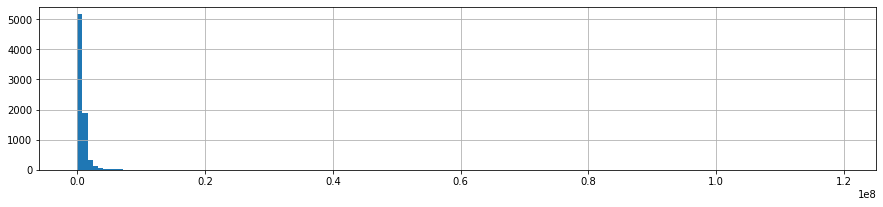

In [31]:
bank.balance.hist(bins = 150, figsize = (15,3));

Значения баланса около 0 рублей являются аномально маленькими. А значения около 10,000,000 рублей практически слились с нулем и являются редкими.

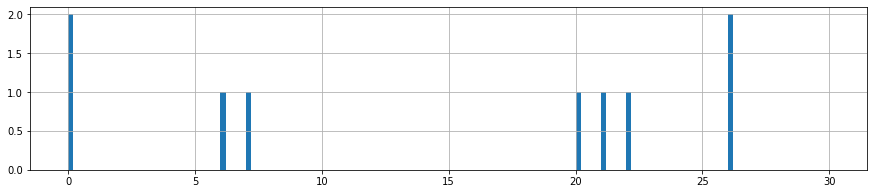

In [32]:
bank.balance.hist(bins = 150, figsize = (15,3), range=(0, 30));

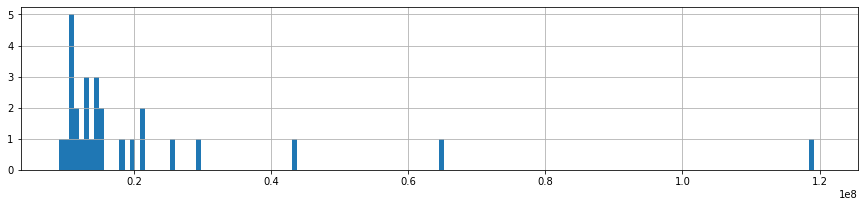

In [33]:
bank.balance.hist(bins = 150, figsize = (15,3), range=(9000000, 120000000));

Построим график "ящик с усами" для столбца `balance`, чтобы посмотреть будут ли отнесены значения близкие к 0 к выбросам:

In [35]:
# визуализируем данные таблицы "rating_category"
fig = px.box(bank, x="balance")

# оформляем график
fig.update_layout(title='Распределение значений в столбце "balance"',
                  xaxis_title='Значения балансов на счетах клиентов, руб',
                  yaxis_title='balance',
                  xaxis={'range':[-100000, 5000000]},
                  bargap=0.5,
                  width=900, 
                  height=300)

fig.show()

Значения, близкие к 0 не являются выбросными. 

In [36]:
# удалим редкие значения в столбце 'balance'
bank = bank[~(bank['balance'] > 10000000)]

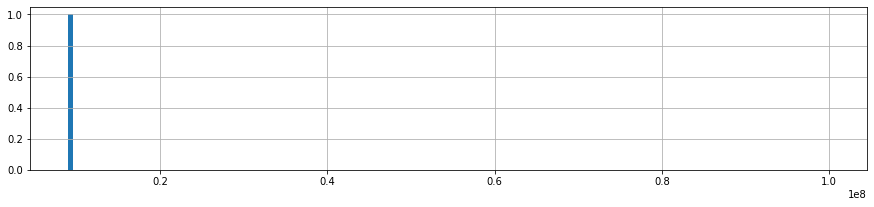

In [37]:
# check
bank.balance.hist(bins = 150, figsize = (15,3), range=(9000000, 100000000));

Изучим данные столбца `est_salary` - заработная плата клиента.

In [38]:
(
     bank[['est_salary']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

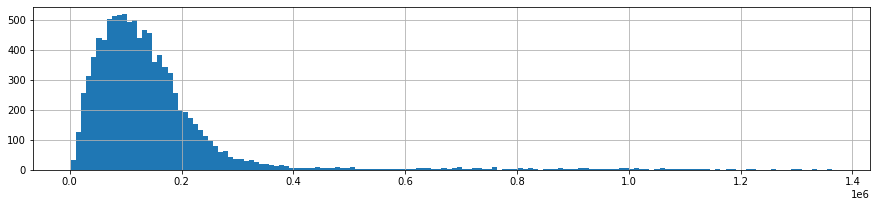

In [39]:
bank.est_salary.hist(bins = 150, figsize = (15,3));

Значения дохода клиентов более 1,200,000 рублей практически слились с нулем и являются редкими.

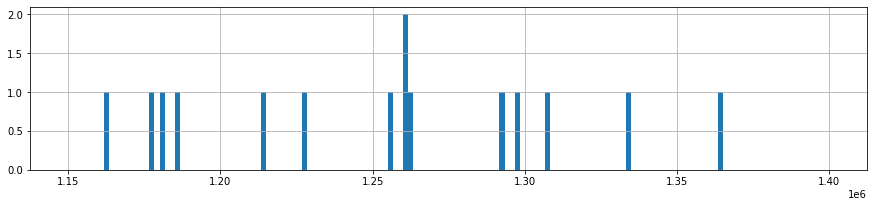

In [40]:
bank.est_salary.hist(bins = 150, figsize = (15,3), range=(1150000, 1400000));

In [41]:
# удалим редкие значения в столбце 'est_salary'
bank = bank[~(bank['est_salary'] > 1200000)]

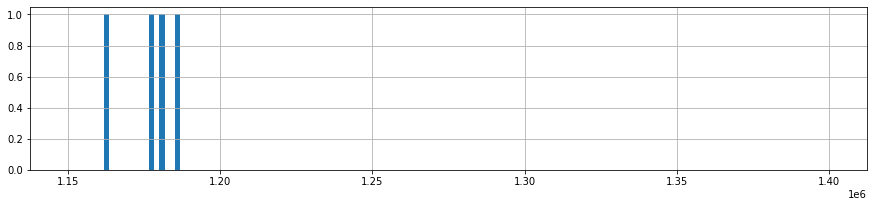

In [42]:
# check
bank.est_salary.hist(bins = 150, figsize = (15,3), range=(1150000, 1400000));

Изучим данные столбца `products` - количество продуктов, которыми пользуется клиент.

In [43]:
bank.products.value_counts()

2    5074
1    3294
3    1025
4     472
5      19
0       1
Name: products, dtype: int64

Обратим внимание на клиента с количеством продуктов `0`. Скорее всего здесь возникла ошибка, так как, если человек является клиентом банка, значит он пользуется его продуктом. Удалим строку с количеством продуктов `0`.

In [44]:
bank = bank[~(bank['products'] == 0)]

In [45]:
# check
bank.products.value_counts()

2    5074
1    3294
3    1025
4     472
5      19
Name: products, dtype: int64

Узнаем, какое количество строк мы удалили из исходного датасета. 

In [46]:
# количество строк в исходном датафреме
raw_df_bank = 10000

# количество строк в датафреме после удаления строк
actual_df_bank = len(bank)

# количество строк, которые мы удалили в абсолютной величине
abs_deleted_lines = raw_df_bank - actual_df_bank

# количество строк, которые мы удалили в относительной величине
rel_deleted_lines = abs_deleted_lines * 100 / raw_df_bank

print('Количество строк, которые мы удалили в абсолютной величине:', abs_deleted_lines)
print('Количество строк, которые мы удалили в относительной величине:', round(rel_deleted_lines, 2), '%')

Количество строк, которые мы удалили в абсолютной величине: 116
Количество строк, которые мы удалили в относительной величине: 1.16 %


### Изменение типов данных

Изучим, к какому типу данных относятся наши столбцы.

In [47]:
# выведем информацию о данных
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9884 entries, 0 to 9926
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9884 non-null   int64  
 1   score          9884 non-null   float64
 2   city           9884 non-null   object 
 3   gender         9884 non-null   object 
 4   age            9884 non-null   float64
 5   equity         9884 non-null   int64  
 6   balance        7633 non-null   float64
 7   products       9884 non-null   int64  
 8   credit_card    9884 non-null   int64  
 9   last_activity  9884 non-null   int64  
 10  est_salary     9884 non-null   float64
 11  churn          9884 non-null   int64  
 12  female         9884 non-null   uint8  
 13  male           9884 non-null   uint8  
 14  Rostov         9884 non-null   uint8  
 15  Rybinsk        9884 non-null   uint8  
 16  Yaroslavl      9884 non-null   uint8  
dtypes: float64(4), int64(6), object(2), uint8(5)
memory 

Столбец `age` - возраст, приведем к целочисленным значениям.

In [48]:
bank['age'] = bank['age'].astype(int)

In [49]:
# check
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9884 entries, 0 to 9926
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9884 non-null   int64  
 1   score          9884 non-null   float64
 2   city           9884 non-null   object 
 3   gender         9884 non-null   object 
 4   age            9884 non-null   int64  
 5   equity         9884 non-null   int64  
 6   balance        7633 non-null   float64
 7   products       9884 non-null   int64  
 8   credit_card    9884 non-null   int64  
 9   last_activity  9884 non-null   int64  
 10  est_salary     9884 non-null   float64
 11  churn          9884 non-null   int64  
 12  female         9884 non-null   uint8  
 13  male           9884 non-null   uint8  
 14  Rostov         9884 non-null   uint8  
 15  Rybinsk        9884 non-null   uint8  
 16  Yaroslavl      9884 non-null   uint8  
dtypes: float64(3), int64(7), object(2), uint8(5)
memory 

## Исследовательский анализ данных

Изучим портреты отточных и неотточных клиентов. Для удобства сравнения портретов пользователей, определим типичного отточного и типичного неотточного клиента, используя средние значения для каждой категории.

In [55]:
typical_churn_notchurn = (bank
                          .drop(columns=['user_id', 'city', 'gender'])
                          .groupby('churn')
                          .agg('mean')
                          .round(2)
                          .T)
                        
typical_churn_notchurn

churn                  0           1
score             845.19      862.75
age                43.02       41.42
equity              2.38        3.76
balance        668463.07  1023325.37
products            1.76        2.38
credit_card         0.71        0.55
last_activity       0.48        0.70
est_salary     145147.95   144467.08
female              0.53        0.35
male                0.47        0.65
Rostov              0.14        0.15
Rybinsk             0.27        0.24
Yaroslavl           0.58        0.61

Сравним портреты пользователей, для этого рассчитаем процентные отличия между значениями признаков отточных и неотточных клиентов, иными словами, узнаем насколько процентов значение признака у отточных клиентов больше по сравнению с неотточными.

In [57]:
user_comparison = (typical_churn_notchurn.loc[:, 1] - typical_churn_notchurn.loc[:, 0]) * 100 \
/ typical_churn_notchurn.loc[:, 0]
                   
user_comparison.sort_values(ascending=False).round(1)

equity           58.0
balance          53.1
last_activity    45.8
male             38.3
products         35.2
Rostov            7.1
Yaroslavl         5.2
score             2.1
est_salary       -0.5
age              -3.7
Rybinsk         -11.1
credit_card     -22.5
female          -34.0
dtype: float64

При сравнении пользователей, мы определили, какие характеристики значительно влияют на отток: 
- `equity ` - количество баллов собственности - у отточных клиентов на 58.0% больше, чем у неотточных;
- `balance` - баланс на счёте - у отточных клиентов на 53.1% больше, чем у неотточных;
- `last_activity` - активный клиент - у отточных активных клиентов на 45.8% больше, чем у неотточных;
- `male` - пол клиента, среди оточных клиентов-мужчин на 38.3% больше, чем у неотточных;
- `products` - количество продуктов, которыми пользуется клиент - у отточных клиентов на 35.2% больше, чем у неотточных.

Изучим корреляции для наших характеристик, особое внимание уделим наличию корреляций с характеристикой оттока. Для обнаружения нелинейных зависимостей будем использовать коэффициент корреляции Phik -`𝜙k`. Рассчитаем матрицу корреляций Phik.

In [58]:
phik_overview = (bank
                 .drop(columns=['user_id', 'city', 'gender'])
                 .phik_matrix())

phik_overview.round(2)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'female', 'male', 'Rostov', 'Rybinsk', 'Yaroslavl']


score   age  equity  balance  products  credit_card  \
score           1.00  0.04    0.53     0.40      0.42         0.21   
age             0.04  1.00    0.04     0.18      0.14         0.16   
equity          0.53  0.04    1.00     0.35      0.58         0.22   
balance         0.40  0.18    0.35     1.00      0.25         0.20   
products        0.42  0.14    0.58     0.25      1.00         0.27   
credit_card     0.21  0.16    0.22     0.20      0.27         1.00   
last_activity   0.05  0.09    0.05     0.03      0.11         0.05   
est_salary      0.38  0.38    0.30     0.66      0.23         0.05   
churn           0.23  0.18    0.35     0.29      0.26         0.20   
female          0.07  0.29    0.06     0.08      0.07         0.20   
male            0.07  0.29    0.06     0.08      0.07         0.20   
Rostov          0.09  0.07    0.06     0.06      0.04         0.15   
Rybinsk         0.02  0.06    0.00     0.02      0.09         0.08   
Yaroslavl       0.08  0.10    0.06     0.08      0.11         0.18   

               last_activity  est_salary  churn  female  male  Rostov  \
score                   0.05        0.38   0.23    0.07  0.07    0.09   
age                     0.09        0.38   0.18    0.29  0.29    0.07   
equity                  0.05        0.30   0.35    0.06  0.06    0.06   
balance                 0.03        0.66   0.29    0.08  0.08    0.06   
products                0.11        0.23   0.26    0.07  0.07    0.04   
credit_card             0.05        0.05   0.20    0.20  0.20    0.15   
last_activity           1.00        0.02   0.26    0.01  0.01    0.00   
est_salary              0.02        1.00   0.05    0.14  0.14    0.14   
churn                   0.26        0.05   1.00    0.22  0.22    0.00   
female                  0.01        0.14   0.22    1.00  1.00    0.02   
male                    0.01        0.14   0.22    1.00  1.00    0.02   
Rostov                  0.00        0.14   0.00    0.02  0.02    1.00   
Rybinsk                 0.08        0.10   0.04    0.00  0.00    0.38   
Yaroslavl               0.08        0.17   0.03    0.03  0.03    0.69   

               Rybinsk  Yaroslavl  
score             0.02       0.08  
age               0.06       0.10  
equity            0.00       0.06  
balance           0.02       0.08  
products          0.09       0.11  
credit_card       0.08       0.18  
last_activity     0.08       0.08  
est_salary        0.10       0.17  
churn             0.04       0.03  
female            0.00       0.03  
male              0.00       0.03  
Rostov            0.38       0.69  
Rybinsk           1.00       0.91  
Yaroslavl         0.91       1.00

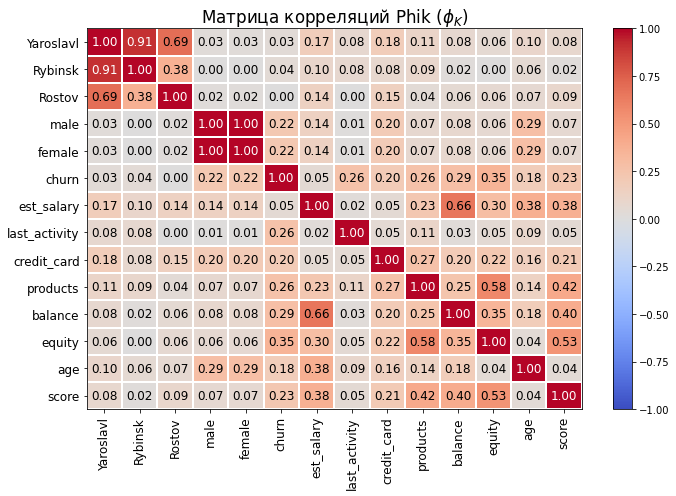

In [59]:
# построим матрицу корреляций Phik
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=-1, vmax=1, color_map="coolwarm", 
                        title=r"Матрица корреляций Phik $(\phi_K$)", 
                        fontsize_factor=1.2, 
                        figsize=(10, 7))
plt.tight_layout()

С помощью матрицы корреляции Фика мы обнаружили зависимости между целевой характеристикой `churn` и такими параметрами как:
- пол клиента - `male` и `female` - 0.22;
- активность клиента - `last_activity` - 0.26;
- наличие кредитной карты - `credit_card` - 0.20;
- количество продуктов, которыми пользуется клиент - `products` - 0.26;
- баланс на счёте - `balance` - 0.29;
- количество баллов собственности - `equity` - 0.35;
- возраст - `age` -  0.18;
- баллы кредитного скоринга - `score` - 0.23.

Для обнаружения линейных зависимостей посчитаем коэффициент корреляции Пирсона.

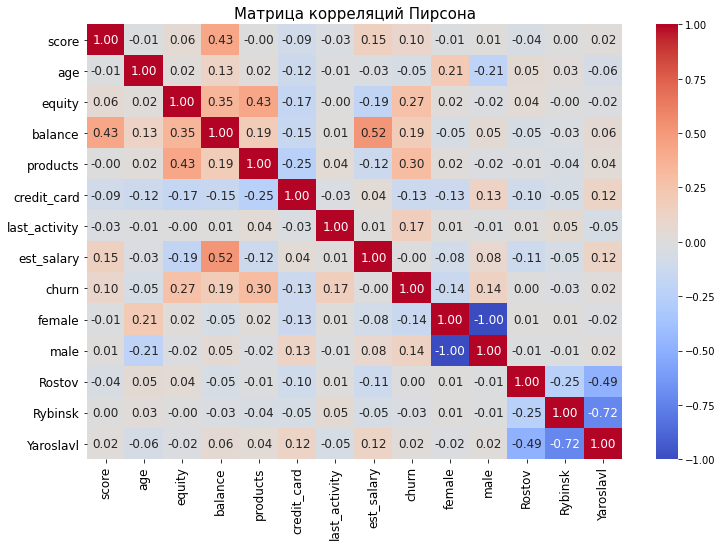

In [60]:
fig = plt.figure()

correlation_matrix = bank.drop(columns=['user_id', 'city', 'gender']).corr()

ax = sns.heatmap(correlation_matrix.round(2),
                 annot=True,
                 center=0,
                 cmap='coolwarm',
                 fmt='.2f',
                 annot_kws={"size": 12}); 

plt.title('Матрица корреляций Пирсона', fontsize = 15)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

fig.set_figwidth(12)   
fig.set_figheight(8)

plt.show()

Выделим все значения коэффициента корреляции с нашей целевой характеристикой - `churn`.

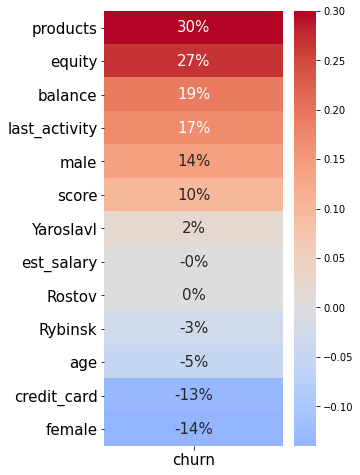

In [61]:
fig = plt.figure(figsize=(4, 8))

correlation_matrix = bank.drop(columns=['user_id', 'city', 'gender']).corr().round(2)

ax = sns.heatmap(
    correlation_matrix.loc[:, ['churn']].drop('churn').sort_values(by='churn', ascending=False),
    annot=True,
    center=0,
    cmap='coolwarm',
    fmt='.0%',
    annot_kws={"size": 15}); 

ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

plt.show()

Мы нашли следующие зависимости между параметрами и целевой характеристикой `churn`:
- `churn - products` - корреляция **30%** - положительная умеренная корреляционная связь: чем больше уровень оттока клиентов, тем больше продуктов использует клиент;


- `churn - equity` - корреляция **27%** - положительная слабая корреляционная связь: чем больше уровень оттока клиентов, тем больше количество баллов собственности;


- `churn - balance` - корреляция **19%** - положительная слабая корреляционная связь: чем больше уровень оттока клиентов, тем больше баланс на счёте;


- `churn - last_activity` - корреляция **17%** - положительная слабая корреляционная связь: чем больше уровень оттока клиентов, тем большую активность проявлял клиент;


- `churn - male` - корреляция **14%** - положительная слабая корреляционная связь: чем больше уровень оттока клиентов, тем больше среди них клиентов-мужчин;


- `churn - score` - корреляция **10%** - положительная слабая корреляционная связь: чем больше уровень оттока клиентов, тем выше баллы кредитного скоринга;


- `churn - credit_card` - корреляция **-13%** - отрицательная слабая корреляционная связь: чем больше уровень оттока клиентов, тем меньше среди них клиентов с кредитной картой;


- `churn - female` - корреляция **-14%** - отрицательная слабая корреляционная связь: чем больше уровень оттока клиентов, тем меньше среди них клиентов-женщин.

Обратим внимание, что в отличии от коэффициента Пирсона, коэффициент корреляции Phik обнаружил зависимость между оттоком и возрастом клиента.

### Исследование уровня оттока клиентов

 Узнаем общий уровень оттока клиентов нашего банка.

In [62]:
churn_probability = round(bank['churn'].sum() * 100 / len(bank), 0)
churn_probability

18.0

Общий уровень оттока клиентов банка "Метанпромбанк" составляет 18%. 

### Исследование вероятности оттока в каждой категории

Исследуем портреты клиентов, которые склонны уходить из нашего банка. Для этого узнаем уровень оттока для каждой категории.

#### Пол

Узнаем уровень оттока для категории `gender` - пол клиента.

In [63]:
gender_category = (bank
                   .query('churn == 1')
                   .groupby(['gender'])
                   .agg(churn = ('gender', 'count'))
                     )

# создадим столбец 'total' который будет содержать общее количество клиентов (мужчин и женщин)
gender_category['total'] = bank.groupby(['gender']).agg(total = ('gender', 'count'))

# создадим столбец 'percent' - доля отточных клиентов
gender_category['percent'] = (gender_category['churn'] * 100 / gender_category['total']).round(2)

gender_category.sort_values(by='percent', ascending=False)

churn  total  percent
gender                       
М        1172   4940    23.72
Ж         634   4944    12.82

In [64]:
# строим столбчатую диаграмму 
fig = px.bar(gender_category.reset_index().sort_values(by='percent'), # загружаем данные и заново их сортируем
             x='percent', # указываем столбец с данными для оси X
             y='gender', # указываем столбец с данными для оси Y
             text='percent', # добавляем аргумент, который отобразит текст с информацией
             hover_data=['churn', 'total'])

# оформляем график
fig.update_layout(title='Уровень оттока для категории - пол клиента',
                  xaxis_title='Уровень оттока, %',
                  yaxis_title='Пол клиента',
                  bargap=0.5,
                  width=900, 
                  height=300)

# добавляем пунктирную линию среднего уровня оттока
fig.add_shape(type='line', 
              x0=churn_probability, y0=-0.4, 
              x1=churn_probability, y1=1.4,
              line=dict(dash='dash'))

fig.show()

Уровень оттока среди мужчин почти в два раза выше, чем у женщин и составляет - 23.72%, у женщин - 12.82%. Обратим внимание, что общее количество мужчин и женщин среди клиентов банка практически одинаковое - 4940 мужчин и 4944 женщин.

#### Возраст

Узнаем уровень оттока для категории `age` - пол клиента. Для нашего удобства создадим функцию `category_churn`, которая на вход будет принимать наш датафрейм - `dataframe` и столбец по которому мы хотим сделать группировку - `column`.

In [65]:
def category_churn(dataframe, column):
    column_category = (dataframe
                       .query('churn == 1')
                       .groupby(column)
                       .agg(churn = (column, 'count'))
                      )
    
    # создадим столбец 'total' который будет содержать общее количество клиентов в группе
    column_category['total'] = dataframe.groupby(column).agg(total = (column, 'count'))
 
    # создадим столбец 'percent' - доля отточных клиентов
    column_category['percent'] = (column_category['churn'] * 100 / column_category['total']).round(2)
    
    return(column_category)

In [66]:
age_category = category_churn(bank, 'age')
age_category

churn  total  percent
age                       
18       1     13     7.69
19       1     16     6.25
20       3     23    13.04
21       4     15    26.67
22       4     26    15.38
23       5     53     9.43
24      13     89    14.61
25      31    140    22.14
26      39    155    25.16
27      53    170    31.18
28      48    210    22.86
29      62    233    26.61
30      53    271    19.56
31      66    324    20.37
32      75    376    19.95
33      72    389    18.51
34      88    376    23.40
35      73    384    19.01
36      60    411    14.60
37      73    397    18.39
38      61    331    18.43
39      54    327    16.51
40      44    321    13.71
41      51    303    16.83
42      45    307    14.66
43      34    262    12.98
44      32    261    12.26
45      20    206     9.71
46      36    195    18.46
47      15    158     9.49
48      28    179    15.64
49      31    185    16.76
50      36    189    19.05
51      38    168    22.62
52      49    152    32.24
53      41    174    23.56
54      47    138    34.06
55      46    164    28.05
56      47    149    31.54
57      42    159    26.42
58      50    168    29.76
59      34    130    26.15
60      36    167    21.56
61      17    145    11.72
62      16    103    15.53
63       7    105     6.67
64       3     93     3.23
65       5     88     5.68
66       3     83     3.61
67       1     57     1.75
68       5     88     5.68
69       5     52     9.62
72       1     35     2.86
73       1     21     4.76
75       1     16     6.25

In [67]:
# строим столбчатую диаграмму 
fig = px.bar(age_category.reset_index().sort_values(by='percent'), 
             x='age', 
             y='percent',
             hover_data=['churn', 'total'])

# оформляем график
fig.update_layout(title='Уровень оттока для категории - возраст клиента',
                  xaxis_title='Возраст клиента',
                  yaxis_title='Уровень оттока, %')

# добавляем пунктирную линию среднего уровня оттока
fig.add_shape(type='line', 
              x0=18, y0=churn_probability, 
              x1=75, y1=churn_probability,
              line=dict(dash='dash'))

fig.show()

Глядя на график, мы можем выделить две группы клиентов, чей уровень оттока превысил средний уровень оттока по банку: 

**Первая группа:** клиенты в возрасте от 25 до 35 лет;

**Вторая группа:** клиенты в возрасте от 50 до 60 лет.

Несмотря на большой уровень оттока клиентов в возрасте 21 года - 26.67%, их общее количество мало - всего 15 человек.

#### Город

Изучим уровень оттока клиентов категории `city` - город.

In [68]:
city_category = category_churn(bank, 'city')
city_category

churn  total  percent
city                            
Ростов       264   1415    18.66
Рыбинск      436   2652    16.44
Ярославль   1106   5817    19.01

In [69]:
# строим столбчатую диаграмму 
fig = px.bar(city_category.reset_index().sort_values(by='percent'),
             x='percent',
             y='city',
             text='percent',
             hover_data=['churn', 'total'])

# оформляем график
fig.update_layout(title='Уровень оттока для категории - город',
                  xaxis_title='Уровень оттока, %',
                  yaxis_title='Город',
                  bargap=0.5,
                  width=900, 
                  height=300)

# добавляем пунктирную линию среднего уровня оттока
fig.add_shape(type='line', 
              x0=churn_probability, y0=-0.4, 
              x1=churn_probability, y1=2.2,
              line=dict(dash='dash'))

fig.show()

Уровень оттока в Ярославле и Ростове практически одинаковый - 19.01% и 18.66% соответственно, немного превысив средний уровень оттока по банку. Вероятность оттока в Рыбинске немного меньше - 16.44%. Обратим внимание, что самое большое количество клиентов находится в Ярославле - 5817 человек, а самое мальнькое в Ростове - 1415 человек.

#### Баллы кредитного скоринга

Исследуем в разрезе оттока баллы кредитного скоринга.

In [70]:
score_category = category_churn(bank, 'score')
score_category.head(5)

churn  total  percent
score                       
706.0      1     11     9.09
707.0      1      6    16.67
727.0      1     12     8.33
728.0      1      9    11.11
730.0      1      8    12.50

In [71]:
# строим гистограмму
fig = px.histogram(bank,
                   x='score',
                   color='churn',
                   histnorm='probability density',
                   barmode ='overlay')

# оформляем график
fig.update_layout(title='Распределение баллов кредитного скоринга для отточных и неотточных клиентов',
                  xaxis_title='Баллы кредитного скоринга',
                  yaxis_title='Плотность распределения',
                  legend_title='Категория')

# добавим пользовательские метки для пояснений
fig.update_traces(name='Неотточные', selector=dict(name='0'))
fig.update_traces(name='Отточные', selector=dict(name='1'))

fig.show()

Глядя на график, мы можем выделить клиентов кредитного скоригна от 820 до 909 баллов, которые больше подвержены оттоку.

#### Количество баллов собственности

Узнаем вероятность оттока в зависимости от категории `equity` - количество баллов собственности.

In [72]:
equity_category = category_churn(bank, 'equity')
equity_category

churn  total  percent
equity                       
0          90   2546     3.53
1          93    771    12.06
2         166   1045    15.89
3         317   1525    20.79
4         461   1832    25.16
5         571   1895    30.13
6          58    161    36.02
7          37     79    46.84
8           6     17    35.29
9           7     13    53.85

In [73]:
# строим столбчатую диаграмму 
fig = px.bar(equity_category.reset_index().sort_values(by='percent'),
             x='equity',
             y='percent',
             text='percent',
             hover_data=['churn', 'total'])

# оформляем график
fig.update_layout(title='Уровень оттока для категории - количество баллов собственности',
                  xaxis_title='Количество баллов собственности',
                  yaxis_title='Уровень оттока, %')

# добавляем пунктирную линию среднего уровня оттока
fig.add_shape(type='line', 
              x0=0, y0=churn_probability, 
              x1=9, y1=churn_probability,
              line=dict(dash='dash'))

fig.show()

Глядя на график, мы можем сделать следующий вывод: чем больше баллов собственности у клиента, тем выше вероятность оттока. Обратим внимание, что количество клиентов у которых баллов собственности от `6` до `9` сравнительно мало от 13 до 161 человека, по сравнению с клиентами от `0` до  `5` баллов - от 771 до 1895 человек. Клиенты от `3` до `9` баллов собственности, превысили средний уровень оттока по банку.

#### Баланс на счёте клиента

Исследуем в разрезе оттока `balance` - баланс на счёте клиента.

In [74]:
# строим гистограмму
fig = px.histogram(bank,
                   x='balance',
                   color='churn',
                   histnorm='probability density',
                   barmode ='overlay')

# оформляем график
fig.update_layout(title='Распределение баланса на счёте для отточных и неотточных клиентов',
                  xaxis_title='Баланс, руб',
                  yaxis_title='Плотность распределения',
                  legend_title='Категория')

# добавим пользовательские метки для пояснений
fig.update_traces(name='Неотточные', selector=dict(name='0'))
fig.update_traces(name='Отточные', selector=dict(name='1'))

fig.show()

Среди отточных клиентов, мы наблюдаем большее количество клиентов с балансом от 1.125 млн. рублей до 4.075 млн. рублей. 

В дальнейшем необходимо будет провести дополнительное исследование, которое покажет есть ли значимая разница между балансами отточных и неотточных клиентов.

#### Количество продуктов, которыми пользуется клиент

Исследуем вероятность оттока категории `products` - количество продуктов, которыми пользуется клиент.

In [75]:
products_category = category_churn(bank, 'products')
products_category

churn  total  percent
products                       
1           233   3294     7.07
2           969   5074    19.10
3           297   1025    28.98
4           299    472    63.35
5             8     19    42.11

In [76]:
# строим столбчатую диаграмму 
fig = px.bar(products_category.reset_index().sort_values(by='percent'),
             x='products',
             y='percent',
             text='percent',
             hover_data=['churn', 'total'])

# оформляем график
fig.update_layout(title='Уровень оттока для категории - количество продуктов, которыми пользуется клиент',
                  xaxis_title='Количество продуктов',
                  yaxis_title='Уровень оттока, %')

# добавляем пунктирную линию среднего уровня оттока
fig.add_shape(type='line', 
              x0=0.7, y0=churn_probability, 
              x1=5.4, y1=churn_probability,
              line=dict(dash='dash'))

fig.show()

Глядя на график, мы можем сделать следующий вывод: чем больше количество продуктов, которыми пользуется клиент, тем выше вероятность оттока. Также отметим, что самое большое количество клиентов пользуются двумя продуктами банка - 5074 человек, всего 19 человек пользуются пятью продуктами. Клиенты с количеством от `2` продуктов превысили средний уровень оттока по банку.

#### Активность клиентов за последнее время

Исследуем как активность клиентов влияет на уровень оттока.

In [77]:
last_activity_category = category_churn(bank, 'last_activity')
last_activity_category

churn  total  percent
last_activity                       
0                540   4713    11.46
1               1266   5171    24.48

In [78]:
# строим столбчатую диаграмму 
fig = px.bar(last_activity_category.reset_index(), 
             x='last_activity', 
             y='percent',
             text='percent', 
             hover_data=['churn', 'total'])

# оформляем график
fig.update_layout(title='Уровень оттока для категории - активность клиента',
                  xaxis_title='Активность клиента за последнее время',
                  yaxis_title='Уровень оттока, %',
                  bargap=0.6,
                  width=800)

# указываем значения меток оси x
fig.update_xaxes(tickvals=[0, 1])

# добавляем пунктирную линию среднего уровня оттока
fig.add_shape(type='line', 
              x0=-0.4, y0=churn_probability, 
              x1=1.4, y1=churn_probability,
              line=dict(dash='dash'))

fig.show()

Вероятность оттока клиентов, которые были активны почти в два раза выше - 24.48%, чем у "неактиных" клиентов - 11.46%.
Общее количество "активных" клиентов немного выше, чем "неактивных" - 5171 и 4713 соответственно.

#### Наличие кредитной карты

Изучим, как наличие кредитной карты влияет на уровень оттока клиентов.

In [79]:
credit_card_category = category_churn(bank, 'credit_card')
credit_card_category

churn  total  percent
credit_card                       
0              809   3159    25.61
1              997   6725    14.83

In [80]:
# строим столбчатую диаграмму 
fig = px.bar(credit_card_category.reset_index(), 
             x='credit_card', 
             y='percent',
             text='percent', 
             hover_data=['churn', 'total'])

# оформляем график
fig.update_layout(title='Уровень оттока для категории - наличие кредитной карты',
                  xaxis_title='Наличие кредитной карты',
                  yaxis_title='Уровень оттока, %',
                  bargap=0.6,
                  width=800)

# указываем значения меток оси x
fig.update_xaxes(tickvals=[0, 1])

# добавляем пунктирную линию среднего уровня оттока
fig.add_shape(type='line', 
              x0=-0.4, y0=churn_probability, 
              x1=1.4, y1=churn_probability,
              line=dict(dash='dash'))

fig.show()

Вероятность оттока клиентов у которых нет кредитной карты выше - 25.61%, чем у клиентов с кредитной картой - 14.83%. Отметим, что общее количество клиентов с кредитной картой практически в два раза больше, чем клиентов без неё.

#### Заработная плата клиентов

Исследуем в разрезе оттока заработную плату клиентов.

In [81]:
# строим гистограмму
fig = px.histogram(bank,
                   x='est_salary',
                   color='churn',
                   histnorm='probability density',
                   barmode ='overlay')

# оформляем график
fig.update_layout(title='Распределение заработной платы для отточных и неотточных клиентов',
                  xaxis_title='Заработная плата, руб',
                  yaxis_title='Плотность распределения',
                  legend_title='Категория')

# добавим пользовательские метки для пояснений
fig.update_traces(name='Неотточные', selector=dict(name='0'))
fig.update_traces(name='Отточные', selector=dict(name='1'))

fig.show()

Среди отточных клиентов немного больше людей с зарплатой:
- от 100 до 140 тыс. рублей;
- от 150 до 190 тыс. рублей;
- от 200 до 220 тыс. рублей.

В дальнейшем необходимо будет провести дополнительное исследование, которое покажет есть ли значимая разница между заработнами платами отточных и неотточных клиентов.

## Проверка гипотез

### Средняя заработная плата отточных и неооточных клиентов одинаковая

Для проверки этой гипотезы сформулируем нулевую и альтернативную гипотезу, а также зададим пороговое значение `alpha`.

```
H_0: Средняя заработная плата (est_salary) отточных клиентов (churn = 1) = средняя заработная плата (est_salary) неотточных клиентов (churn = 0)

H_a: Средняя заработная плата (est_salary) отточных клиентов (churn = 1) ≠ редняя заработная плата (est_salary) неотточных клиентов (churn = 0)

alpha = 0.05
```

Для проверки этой гипотезы мы будем использовать t-критерий Стьюдента и u-критерий Манна-Уитни. 

Сначала проверим гипотезу **t-критерием Стьюдента** методом - `scipy.stats.ttest_ind (array1, array2, equal_var)`, так как нам необходимо проверить средние двух выборок. Прежде чем применить этот метод, нам необходимо проверить три аспекта, чтобы понять, можно ли применять t-тест:
1. Генеральные совокупности не должны зависеть друг от друга;
2. Выборочные средние должны быть нормально распределены;
3. Дисперсии рассматриваемых генеральных совокупностей должны быть равны.

Первое условие выполняется - генеральные совокупности не зависят друг от друга. 

Проверим второе условие - выборочные средние должны быть нормально распределены. 

In [82]:
bank.groupby('churn').agg({"user_id":"count"})

user_id
churn         
0         8078
1         1806

Нам необходимо знать размер выборки, чем больше размер выборки, тем более вероятно, что выборочные средние будут приближаться к нормальному распределению. Это объясняется центральной предельной теоремой (ЦПТ). При достаточно большом размере выборки (при N ≥ 30) распределение выборочных средних будет приближаться к нормальному распределению, даже если исходное распределение не является нормальным.

In [83]:
# создадим массивы, содержащие выборки
array_churn_est_salary = bank[bank['churn']== 1]['est_salary']
array_not_churn_est_salary = bank[bank['churn']== 0]['est_salary']

Проверим третье условие - дисперсии рассматриваемых генеральных совокупностей должны быть равны. Нам известно, что если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, необходимо указать параметр equal_var= False. Этот параметр будет учитывать различия в дисперсиях между выборками. Наши выборки сильно отличаются по размеру (размер выборки "отточных" клиентов - 1806, "неотточных" - 8078), и мы предполагаем, что дисперсии у совокупностей разные.

In [87]:
# зададим критический уровень статистической значимости
# если значение p-value окажется меньше значения alpha - отвергнем гипотезу
alpha = .05 

# вызов метода для проверки гипотезы
results = st.ttest_ind(array_churn_est_salary, array_not_churn_est_salary, equal_var=False)

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

p-значение: 0.819395545626993
Не получилось отвергнуть нулевую гипотезу 


При проверке гипотезы с помощью **t-критерия Стьюдента** мы выяснили, что средние заработные платы отточных и неотточных клиентов статистически значимо **не различаются**.

Теперь проверим гипотезу с помощью **u-критерия Манна-Уитни** - методом `st.mannwhitneyu(array1, array2, alternative)`, так как мы выяснили, что наши выборки распределены не нормально. 

Тест имеет параметр `alternative`, по-умолчанию, он принимает значение `None` для совместимости, но в таком случае тест выполняет проверку похожую на одностороннюю, что не совсем корректно для нашего теста. Более корректные результаты можно получить, используя `alternative="two-sided"`.

In [88]:
# критический уровень статистической значимости
alpha = 0.05  

results = st.mannwhitneyu(array_churn_est_salary, array_not_churn_est_salary, alternative='two-sided')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение: 0.0003351176018018515
Отвергаем нулевую гипотезу: разница статистически значима


При проверке гипотезы с помощью **u-критерия Манна-Уитни** мы выяснили, что средние заработные платы отточных и неотточных клиентов статистически значимо **различаются**.

При проверке гипотезы разными методами, мы получили разные результаты: 
- **t-критерий Стьюдента:** `средние заработные платы отточных и неотточных клиентов статистически значимо не различаются`;


- **u-критерий Манна-Уитни:** `средние заработные платы отточных и неотточных клиентов статистически значимо различаются`.

Причины, по которым мы получили разные результаты, проверяя гипотезу t-тестом и u-тестом:
    
   1) t-тест является параметрическим, т.е. по выборке оценивает параметры предполагаемого распределения - среднее значение. u-тест является непараметрческим, т.е. работает с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. t-тест и u-тест имеют различные распределения и свойства, что может приводить к различным результатам; 
   
   2) Результаты тестов могут зависеть от размеры выборки. Тест Стьюдента предполагает нормальное распределение данных и хорошо работает для выборок большого размера, как в нашем случае. Тест Манна-Уитни может использоваться для сравнения средних значений, когда данные не удовлетворяют предположению о нормальности или для выборок малого размера.
    
   При изучении распределения значений заработной платы на этапе исследовательского анализа, мы увидели похожую плотность распределения значений для отточных и неотточных клиентов. В данном случае, когда размеры выборок составляют 1806 и 8078, тест Стьюдента будет более мощным и точным.
    
   **Вывод:** нулевую гипотезу отвергнуть не удалось, средние заработные платы отточных и неотточных клиентов статистически значимо не различаются.

### Средний баланс на счёте отточных и неооточных клиентов одинаковый

Сформулируем нулевую и альтернативную гипотезу, зададим пороговое значение alpha.

```
H_0: Средний баланс на счёте (balance) отточных клиентов (churn = 1) = средний баланс на счёте (balance) неотточных клиентов (churn = 0)

H_a: Средний баланс на счёте (balance) отточных клиентов (churn = 1) ≠ средний баланс на счёте (balance) неотточных клиентов (churn = 0)

alpha = 0.05
```

In [89]:
# создадим массивы, содержащие выборки
array_churn_balance = bank[bank['churn']== 1]['balance']
array_not_churn_balance = bank[bank['churn']== 0]['balance']

Проверим выборки на нормальность с помощью критерия Шапиро-Уилка.

In [90]:
# критический уровень статистической значимости
alpha = 0.05  
results = st.shapiro(array_churn_balance)

# второе значение в массиве результатов (с индексом 1) - p-value
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу, всё нормально


In [91]:
# критический уровень статистической значимости
alpha = 0.05  
results = st.shapiro(array_not_churn_balance)

# второе значение в массиве результатов (с индексом 1) - p-value
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу, всё нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



Выборки `array_churn_balance` и `array_not_churn_balance` распределены нормально. 

В случае неотточных тест указывает, что при количестве значений более 5000 он может не давать верный результат.

3.481530740116844


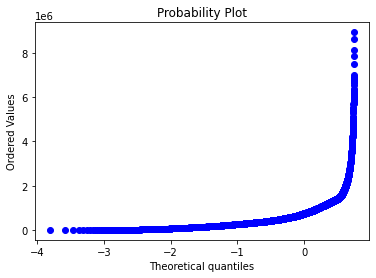

In [92]:
print(bank.balance.skew())

st.probplot(bank.balance, dist="norm", plot=plt);

Так как значения баланса распределены ассиметрично, то мы не можем считать их распределение нормальным. Также нам известно, что в столбце баланса присутствует большое количество выбросов, поэтому проверять гипотезу мы будем с помощью теста Манна-Уитни:

In [93]:
# критический уровень статистической значимости
alpha = 0.05  

results = st.mannwhitneyu(array_churn_balance, array_not_churn_balance, \
                          alternative='two-sided', nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение: 1.4402168398524056e-69
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод:** нулевую гипотезу подтвердить не удалось, средние балансы на счёте отточных и неотточных клиентов статистически значимо различаются.

## Определение стратегических показателей, которые влияют на отток клиентов

На основе проведённого анализа, мы выяснили, какие показатели в значительной степени влияют на отток клиентов:
1. `gender` - пол клиента, именно клиенты-мужчины склонны уходить из нашего банка;
2. `age` - возраст, клиенты в возрасте от 25 - 35 лет и от 50 - 60 лет;
3. `score` - баллы кредитного скоринга, клиенты, у которых от 820 до 909 баллов;
4. `equity` - количество баллов собственности, клиенты, у которых от 3 до 9 баллов;
5. `balance` - баланс на счёте клиента, клиенты с балансом от 1.125 млн. до 4.075 млн. рублей;
6. `products` - количество продуктов, которыми пользуется клиент, клиенты с количеством от 2 продуктов и выше; 
7. `last_act` - клиенты, которые были активны за последнее время;
8. `credit_card` - клиенты, у которых нет кредитных карт;
<!-- 9. `est_salary` - заработная плата клиентов, клиенты с зарплатой от 100 до 220 тыс. рублей. -->

## Сегментация на основе стратегических показателей

На основе стратегических показателей нам необходимо найти сегменты клиентов, которые склонны уходить из нашего банка. 
Каждый сегмент должен удовлетворять нескольким условиям:
- размер сегмента должен быть от 500 до 2000 пользователей;
- вероятность оттока должна быть выше общего уровня оттока нашего банка - более 18%.

Найдем первый сегмент, используя следующие стратегические показатели:
- `gender` - пол клиента, именно клиенты-мужчины склонны уходить из нашего банка;
- `age` - возраст, клиенты в возрасте от 25 - 35 лет.

In [95]:
# найдём первый сегмент, используя параметр 'gender' и 'age' в возрасте от 25 до 35 лет
seg_gender_age_25_35 = bank.query('gender == "М" and age >= 25 and age <= 35')

# выедем на экран название сегмента
print('Сегмент - seg_gender_age_25_35')

# выведем на экран количество клиентов в сегменте
print('Размер сегмента -', len(seg_gender_age_25_35))

# выведем на экран уровень оттока в сегменте
print('Уровень оттока, %  -', 
      round(seg_gender_age_25_35['churn'].sum() * 100 / len(seg_gender_age_25_35), 0))

# выведем на экран количество отточных клиентов в сегменте
print('Количество отточных клиентов -', seg_gender_age_25_35['churn'].sum())

Сегмент - seg_gender_age_25_35
Размер сегмента - 1762
Уровень оттока, %  - 25.0
Количество отточных клиентов - 449


Мы определили 8 стратегических показателей. Нам необходимо сделать срез данных, в паре по каждому параметру, и посмотреть какие пары параметров удовлетворяют условиям, предъявляемому к сегменту. Для этого создадим список `queries_list`, куда запишем все стратегические показатели. Затем создадим цикл, который будет последовательно брать пару параметров, и проверять удовлетворяет ли полученный срез данных условиям, которые предъявляются к сегменту. Сегменты, которые будут удовляетворять условиям запишем в переменную `segments`.

In [96]:
# создадим список 'queries_list', куда запишем все стратегические параметры
queries_list = [
    'gender == "М"',
    'age >= 25 and age <= 35',
    'age >= 50 and age <= 60',
    'score >= 820 and score <= 909',
    'equity >= 3 and equity <= 9',
    'balance >= 1125000 and balance <= 4075000',
    'products >= 2',
    'last_activity == 1',
    'credit_card == 0']

# создадим пустой список 'segments', куда будем записывать срезы данных, 
# которые будут удовлетворять условиям, предъявляемым к сегменту
segments = []

# вызовем функцию enumerate(), которая будет возвращать индекс и элемент списка на каждой итерации
for index, query in enumerate(queries_list):

    # внутри цикла, запишем вложенный цикл, который будет начинаться со следующего индекса после текущего индекса index
    for j in range(index + 1, len(queries_list)):
        
        # добавим условие, которое будет проверять является ли текущий index последним элементом списка, 
        # для того, чтобы предотвратить обращение к несуществующему индексу j
        if index < len(queries_list) - 1: 
            
            # находим следующий элемент списка
            next_query = queries_list[j]
            
            # находим сегмент, объединив текущий и следующий элемент списка
            current_segment = bank.query(query + ' and ' + next_query)
            
            # добавим условие, которое будем проверять, что сегмент не пустой
            if len(current_segment) != 0:
                
                # если сегмент не пустой, тогда проверяем размер сегмента 
                is_correct_segment_size = 500 <= len(current_segment) <= 2000
                
                # находим уровень оттока в сегменте
                churn_rate = round(current_segment['churn'].sum() * 100 / len(current_segment), 2)
               
                # проверяем, что уровень оттока больше уровня оттока по банку
                is_churn_rate = churn_rate > 18
                
                # находим количество отточных клиентов
                churn_users = current_segment['churn'].sum()
                
                # если размер сегмента и уровень оттока удовлетворяют условию,
                # добавляем найденны срез данных в переменную 'segments'
                if is_correct_segment_size and is_churn_rate:
                    segments.append(current_segment)
                    
                    # на экран выводим по каким стратегическим показателям был сформирован сегмент,
                    # добавляем уровень оттока в %,
                    # размер сегмента,
                    # количество отточных клиентов
                    print(
                        'Сегмент -', query, ',', next_query, 
                        '\nУровень оттока, % -', churn_rate, 
                        '\nРазмер сегмента -', len(current_segment),
                        '\nКоличество отточных клиентов -', churn_users, '\n')

Сегмент - gender == "М" , age >= 25 and age <= 35 
Уровень оттока, % - 25.48 
Размер сегмента - 1762 
Количество отточных клиентов - 449 

Сегмент - gender == "М" , age >= 50 and age <= 60 
Уровень оттока, % - 33.38 
Размер сегмента - 770 
Количество отточных клиентов - 257 

Сегмент - gender == "М" , balance >= 1125000 and balance <= 4075000 
Уровень оттока, % - 53.18 
Размер сегмента - 754 
Количество отточных клиентов - 401 

Сегмент - gender == "М" , credit_card == 0 
Уровень оттока, % - 35.12 
Размер сегмента - 1287 
Количество отточных клиентов - 452 

Сегмент - age >= 25 and age <= 35 , score >= 820 and score <= 909 
Уровень оттока, % - 29.06 
Размер сегмента - 1497 
Количество отточных клиентов - 435 

Сегмент - age >= 25 and age <= 35 , equity >= 3 and equity <= 9 
Уровень оттока, % - 32.79 
Размер сегмента - 1705 
Количество отточных клиентов - 559 

Сегмент - age >= 25 and age <= 35 , products >= 2 
Уровень оттока, % - 28.89 
Размер сегмента - 1990 
Количество отточных клиен

In [97]:
# узнаем какое количество сегментов мы нашли
print('Количество сегментов, удовлетворяющих условиям -', len(segments))

Количество сегментов, удовлетворяющих условиям - 21


### Приоритизация сегментов

Всего мы обнаружили 21 сегмент. Среди них мы выделим три сегмента с самым большим количеством отточных клиентов:
1) Сегмент_№1 - **last_activity == 1 , credit_card == 0**, 
   количество отточных клиентов **607** человек;

2) Сегмент_№2 - **balance >= 1125000 and balance <= 4075000 , products >= 2**, 
   количество отточных клиентов **585** человек;

3) Сегмент_№3 - **age >= 25 and age <= 35 , products >= 2**, 
   количество отточных клиентов **575** человек;

### Cегмент_№1

Узнаем осоновную информацию о клиентах, которые попали в первый сегмент. Для этого сохраним первый сегмент в переменную `segment_1_last_activity_credit_card`.

In [99]:
segment_1_last_activity_credit_card = bank.query('last_activity == 1 and credit_card == 0')

# выедем на экран название сегмента
print('Сегмент_№1 - segment_1_last_activity_credit_card')

# выведем на экран количество клиентов в сегменте
print('Размер сегмента -', len(segment_1_last_activity_credit_card))

# выведем на экран уровень оттока в сегменте
print('Уровень оттока, %  -', 
      round(segment_1_last_activity_credit_card['churn'].sum() * 100 / 
            len(segment_1_last_activity_credit_card), 2))

# выведем на экран количество отточных клиентов в сегменте
print('Количество отточных клиентов -', segment_1_last_activity_credit_card['churn'].sum())

Сегмент_№1 - segment_1_last_activity_credit_card
Размер сегмента - 1729
Уровень оттока, %  - 35.11
Количество отточных клиентов - 607


Клиенты в **первом сегменте** были активны в последнее время и у них нет кредитной карты. Посмотрим на типичного клиента в первом сегменте.

In [100]:
# типичный клиент сегмента_№1
typical_segment_1_last_activity_credit_card = segment_1_last_activity_credit_card.mean().round(2)
typical_segment_1_last_activity_credit_card

user_id          169098.41
score               856.13
age                  44.77
equity                3.17
balance          901494.10
products              2.18
credit_card           0.00
last_activity         1.00
est_salary       137318.98
churn                 0.35
female                0.59
male                  0.41
Rostov                0.20
Rybinsk               0.32
Yaroslavl             0.48
dtype: float64

Обратим внимание, что у типичного клиента в первом сегменте достаточно высокие баллы кредитного скоринга - 856, это клиенты среднего возраста - 45 лет, у них небольшое количество баллов собственности - 3 балла, достаточно большой баланс на счёте - 902698.48 рублей, они пользуются двумя продуктами и у них достаточно высокая заработная плата - 137362.24 рублей.

#### Рекомендации

На основе данных о клиентах в первом сегменте, дадим рекомендации, которые помогут вернуть клиентов в банк или удержать сомневающихся от оттока.

**Рекомендации для Сегмента_№1:**
- предоставить специальные предложения и скидки на различные услуги банка;
- предоставить предложения по кредитным картам, особое внимание уделить льготному периоду без процентов или кэшбэку;
- предоставить информацию о финансовых продуктах банка, инвестиционных возможностях или планировании пенсии;
- предоставить информацию о виртуальных дебетовых карт для интернет-покупок с накоплением бонусных баллов за каждую транзакцию. 

### Сегмент_№2

Изучим второй сегмент, сохраним информацию о втором сегменте в переменой `segment_2_balance_products`.

In [101]:
segment_2_balance_products = bank.query('balance >= 1125000 and balance <= 4075000 and products >= 2')

# выедем на экран название сегмента
print('Сегмент_№2 - segment_2_balance_products')

# выведем на экран количество клиентов в сегменте
print('Размер сегмента -', len(segment_2_balance_products))

# выведем на экран уровень оттока в сегменте
print('Уровень оттока, %  -', 
      round(segment_2_balance_products['churn'].sum() * 100 / 
            len(segment_2_balance_products), 2))

# выведем на экран количество отточных клиентов в сегменте
print('Количество отточных клиентов -', segment_2_balance_products['churn'].sum())

Сегмент_№2 - segment_2_balance_products
Размер сегмента - 1290
Уровень оттока, %  - 45.35
Количество отточных клиентов - 585


Все клиенты во **втором сегменте** имеют высокий баланс на счёте - от 1,125 млн. рублей - 4,075 млн. рублей, они пользуются двумя и более продуктами. Посмотрим на типичного пользователя во втором сегменте.

In [102]:
# типичный клиент сегмента_№2
typical_segment_2_balance_products = segment_2_balance_products.mean().round(2)
typical_segment_2_balance_products

user_id           172817.36
score                877.94
age                   45.84
equity                 4.19
balance          1714989.64
products               2.54
credit_card            0.44
last_activity          0.53
est_salary        167224.84
churn                  0.45
female                 0.48
male                   0.52
Rostov                 0.13
Rybinsk                0.24
Yaroslavl              0.63
dtype: float64

У типичного клиента во втором сегменте достаточно высокие баллы кредитного скоринга - 878, это клиенты среднего возраста - 46 лет, количество баллов собственности - 4 балла, и у них достаточно высокая заработная плата - 167224.84 рублей. Около половины пользователей проявляли свою активность за последнее время, а также чуть менее половины имеют кредитные карты.

#### Рекомендации

На основе данных о клиентах во втором сегменте, дадим соответствующие рекомендации.

**Рекомендации для Сегмента_№2:**
- предоставить дополнительные привелегии, например бесплатное обслуживание или льготные процентные ставки по кредитам;
- предложить инвестировать в ценные бумаги или инвестиционные фонды;
- предложить программу страхования жизни и имущества;
- обеспечить высокий уровень защиты от мошенничества;
- регулярно информировать о продуктах, услугах и акциях банка.

### Сегмент_№3

Узнаем больше информации о клиентах в третьем сегменте, сохраним данные в переменой `segment_3_age_25_35_products`.

In [103]:
segment_3_age_25_35_products = bank.query('age >= 25 and age <= 35 and products >= 2')

# выедем на экран название сегмента
print('Сегмент_№3 - segment_3_age_25_35_products')

# выведем на экран количество клиентов в сегменте
print('Размер сегмента -', len(segment_3_age_25_35_products))

# выведем на экран уровень оттока в сегменте
print('Уровень оттока, %  -', 
      round(segment_3_age_25_35_products['churn'].sum() * 100 / 
            len(segment_3_age_25_35_products), 2))

# выведем на экран количество отточных клиентов в сегменте
print('Количество отточных клиентов -', segment_3_age_25_35_products['churn'].sum())

Сегмент_№3 - segment_3_age_25_35_products
Размер сегмента - 1990
Уровень оттока, %  - 28.89
Количество отточных клиентов - 575


Все клиенты в третьем сегменте - это молодые люди в возрасте от 25 до 35 лет, они пользуются двумя и более продуктами. Посмотрим на типичного пользователя.

In [104]:
# типичный клиент сегмента_№3
typical_segment_3_age_25_35_products = segment_3_age_25_35_products.mean().round(2)
typical_segment_3_age_25_35_products

user_id          169735.89
score               849.72
age                  31.03
equity                3.34
balance          652800.20
products              2.32
credit_card           0.64
last_activity         0.55
est_salary       113469.33
churn                 0.29
female                0.44
male                  0.56
Rostov                0.13
Rybinsk               0.25
Yaroslavl             0.62
dtype: float64

У типичного клиента в третьем сегменте достаточно средние баллы кредитного скоринга - 850, количество баллов собственности - 3 балла, высокий баланс на счёте - 652800.20 рублей, заработная плата - 113469.33 рублей, около половины пользователей проявляли свою активность за последнее время, а также более половины клиентов имеют кредитные карты.

#### Рекомендации

На основе данных о клиентах в третьем сегменте, дадим рекомендации, которые помогут вернуть клиентов в банк или удержать сомневающихся от оттока.

**Рекомендации для Сегмента_№3:**
- обеспечить удобство, быстроту и простоту взаимодействия с банком;
- предложить образовательные ресурсы по финансовой грамотности, например предоставить онлайн-материалы, которые помогут клиентам понимать основы инвестирования и управления личными финансами;
- предложить программу лояльности, в которой будут скидки на продукты или возможность получения кэшбэка;
- предложить поддержку на услуги по открытию и ведению бизнес-счетов.

## Презентация

 * [Презентация](https://drive.google.com/file/d/12wnQEZhrfzgMINYCBOp_FEzG57nlkFcv/view?usp=sharing)

## Дашборд

* [Дашборд](https://public.tableau.com/app/profile/daria.buss/viz/Dashbord_16873797842540/sheet24?publish=yes)

## Общий вывод

**На этапе предобработки данных мы проделали следующую работу:**
1. Все названия столбцов привели к нижнему регистру, заменили название столбца `userid` на `user_id`.
2. Удалили явные дубликаты в столбце `user_id` - идентификатор пользователя.
3. Закодировали копии столбцов `gender` - пол и `city` - город, получили новые столбцы: `female`, `male`, `Rostov`, `Rybinsk` и `Yaroslavl`.
4. Удалили строки с пропусками в столбце `age` - возраст, пропуски в столбце `balance` - баланс на счёте, оставили без изменений.
5. Обработали аномальные значения в столбцах `balance` - баланс на счёте, `est_salary` - заработная плата клиента и `products` - количество продуктов, которыми пользуется клиент.
6. Заменили вещественный тип данных в столбце `age` - возраст, на целочисленный.

**Провели исследовательский анализ данных:**

*1. Исследовали портреты типичного отточного и неооточного пользователя, определили характеристики, которые влияют на отток:*
- `equity ` - количество баллов собственности - у отточных клиентов на 58.0% больше, чем у неотточных;
- `balance` - баланс на счёте - у отточных клиентов на 53.1% больше, чем у неотточных;
- `last_activity` - активный клиент - у отточных активных клиентов на 45.8% больше, чем у неотточных;
- `male` - пол клиента, среди оточных клиентов-мужчин на 38.3% больше, чем у неотточных;
- `products` - количество продуктов, которыми пользуется клиент - у отточных клиентов на 35.2% больше, чем у неотточных.

*2. Исследовали нелинейные зависимости (коэффициент корреляции Phik - 𝜙k) между всеми параметрами, обнаружили зависимости между целевой характеристикой оттока и такими параметрами как:*
- `male` и `female` - пол клиента - 0.22;
- `last_activity` - активность клиента - 0.26;
- `credit_card` - наличие кредитной карты - 0.20;
- `products` - количество продуктов, которыми пользуется клиент - 0.26;
- `balance` - баланс на счёте - 0.29;
- `equity` - количество баллов собственности - 0.35;
- `age` - возраст - 0.18;
- `score` - баллы кредитного скоринга - 0.23.

*3. Исследовали линейные зависимости (коэффициент корреляции Пирсона) между всеми параметрами, обнаружили зависимости между целевой характеристикой оттока и такими параметрами как:*
- `male` - корреляция **14%** - положительная слабая корреляционная связь: чем больше уровень оттока клиентов, тем больше среди них клиентов-мужчин;
- `female` - корреляция **-14%** - отрицательная слабая корреляционная связь: чем больше уровень оттока клиентов, тем меньше среди них клиентов-женщин.
- `last_activity` - корреляция **17%** - положительная слабая корреляционная связь: чем больше уровень оттока клиентов, тем большую активность проявлял клиент;
- `credit_card` - корреляция **-13%** - отрицательная слабая корреляционная связь: чем больше уровень оттока клиентов, тем меньше среди них клиентов с кредитной картой;
- `products` - корреляция **30%** - положительная умеренная корреляционная связь: чем больше уровень оттока клиентов, тем больше продуктов использует клиент;
- `balance` - корреляция **19%** - положительная слабая корреляционная связь: чем больше уровень оттока клиентов, тем больше баланс на счёте;
- `churn - equity` - корреляция **27%** - положительная слабая корреляционная связь: чем больше уровень оттока клиентов, тем больше количество баллов собственности;
- `score` - корреляция **10%** - положительная слабая корреляционная связь: чем больше уровень оттока клиентов, тем выше баллы кредитного скоринга;

*4. Общий уровень оттока клиентов банка "Метанпромбанк" составляет 18%*

*5. Исследовали уровень оттока в каждой категории:*

Категория **`gender`** - пол:
- Уровень оттока среди клиентов-мужчин составляет - 23.72% или 1172 пользователя; 
- Уровень оттока среди клиентов-женщин - 12.82% или 634 пользователя.

Категория **`age`** - возраст:
- Уровень оттока клиентов в возрасте от 25 до 35 лет составляет - от 18.55 - 31.18%;
- Уровень оттока клиентов в возрасте от 50 до 60 лет составляет - от 19.05 - 34.06%.

Категория **`city`** - город:
- Уровень оттока в клиентов из Ярославля составляет - 19.01% или 1106 пользователя;
- Уровень оттока в клиентов из Ростова составляет - 18.66% или 264 пользователя;
- Уровень оттока в клиентов из Рыбинска составляет - 16.44% или 436 пользователя.

Категория **`score`** - баллы кредитного скоринга:
- Клиенты, у которых баллы кредитного скоринга составляют от 820 - 909 баллов больше подвержены оттоку.

Категория **`equity`** - количество баллов собственности:
- `0` баллов, уровень оттока - 3.53% или 90 пользователей;
- `1` балл, уровень оттока - 12.06% или 93 пользователя;
- `2` балла, уровень оттока -15.89% или 166 пользователей;
- `3` балла, уровень оттока -20.79% или 317 пользователей;
- `4` балла, уровень оттока -25.16% или 461 пользователь;
- `5` баллов, уровень оттока -30.13% или 571 пользователей;
- `6` баллов, уровень оттока -36.02% или 58 пользователей;
- `7` баллов, уровень оттока - 46.84% или 37 пользователей;
- `8` баллов, уровень оттока - 35.29% или 6 пользователей;
- `9` баллов, уровень оттока - 53.85% или 7 пользователей.

Категория **`balance`** - баланс на счёте клиента:
- Клиенты, у которых баланс на счёте составляет от 1.125 млн. рублей до 4.075 млн. рублей больше подвержены оттоку.

Категория **`products`** - количество продуктов, которыми пользуется клиент:
- `1` продукт, уровень оттока - 7.07% или 233 пользователя;
- `2` продукта,	уровень оттока - 19.10% или 969 пользователей;
- `3` продукта,	уровень оттока - 28.98% или 297 пользователей;
- `4` продукта,	уровень оттока - 63.35% или 299 пользователей;
- `5` продуктов, уровень оттока - 42.11 или 8 пользователей.

Категория **`last_activity`** - активность клиентов за последнее время:
- Уровень оттока у "активных" клиентов составляет - 24.48% или 1266 пользователей;
- Уровень оттока у "неактиных" клиентов составляет - 11.46% или 540 пользователей. 

Категория **`credit_card`** - наличие кредитной карты:
- Уровень оттока у клиентов с кредитной картой составляет - 14.83% или 997 пользователей
- Уровень оттока у клиентов без кредитной карты составляет - 25.61% или 809 пользователей.

Категория **`est_salary`** - заработная плата клиентов:
- Клиенты, у которых заработная плата составляет от 100 - 220 тыс. рублей больше подвержены оттоку.

**Провели проверку гипотез и установили, что:**
1. Средние заработные платы отточных и неотточных клиентов статистически значимо не различаются.
2. Средние балансы на счёте отточных и неотточных клиентов статистически значимо различаются.

**Определили стратегические показатели, которые влияют на отток клиентов:**
1. `gender` - пол клиента, именно клиенты-мужчины склонны уходить из нашего банка;
2. `age` - возраст, клиенты в возрасте от 25 - 35 лет и от 50 - 60 лет;
3. `score` - баллы кредитного скоринга, клиенты, у которых от 820 до 909 баллов;
4. `equity` - количество баллов собственности, клиенты, у которых от 3 до 9 баллов;
5. `balance` - баланс на счёте клиента, клиенты с балансом от 1.125 млн. до 4.075 млн. рублей;
6. `products` - количество продуктов, которыми пользуется клиент, клиенты с количеством от 2 продуктов и выше; 
7. `last_act` - клиенты, которые были активны за последнее время;
8. `credit_card` - клиенты, у которых нет кредитных карт.

**Провели сегментацию на основе стратегических показателей, выделели три сегмента с самым большим количеством отточных пользователей:**
1. **Сегмент_№1**
- **Клиенты были активны в последнее время**; 
- **У клиентов нет кредитной карты**;
- Размер сегмента - 1727 клиентов;
- Уровень оттока - 35.11%;
- Количество отточных клиентов - 607 человек.

**Рекомендации для отдела маркетинга по удержанию клиентов в сегменте_№1:**
- предоставить специальные предложения и скидки на различные услуги банка;
- предоставить предложения по кредитным картам, особое внимание уделить льготному периоду без процентов или кэшбэку;
- предоставить информацию о финансовых продуктах банка, инвестиционных возможностях или планировании пенсии;
- предоставить информацию о виртуальных дебетовых карт для интернет-покупок с накоплением бонусных баллов за каждую транзакцию.

2. **Сегмент_№2**
- **Клиенты имеют баланс на счёте от 1,125 - 4,075 млн. рублей**; 
- **Клиенты пользуются двумя и более продуктами**;
- Размер сегмента - 1290 клиентов;
- Уровень оттока - 45.35%;
- Количество отточных клиентов - 585 человек.

**Рекомендации для отдела маркетинга по удержанию клиентов в сегменте_№2:**
- предоставить дополнительные привелегии, например бесплатное обслуживание или льготные процентные ставки по кредитам;
- предложить инвестировать в ценные бумаги или инвестиционные фонды;
- предложить программу страхования жизни и имущества;
- обеспечить высокий уровень защиты от мошенничества;
- регулярно информировать о продуктах, услугах и акциях банка.

3. **Сегмент_№3**
- **Клиенты в возрасте от 25 до 35 лет**; 
- **Клиенты пользуются двумя и более продуктами**;
- Размер сегмента - 1990 клиентов;
- Уровень оттока - 28.89%;
- Количество отточных клиентов - 575 человек.

**Рекомендации для отдела маркетинга по удержанию клиентов в сегменте_№3:**
- обеспечить удобство, быстроту и простоту взаимодействия с банком;
- предложить образовательные ресурсы по финансовой грамотности, например предоставить онлайн-материалы, которые помогут клиентам понимать основы инвестирования и управления личными финансами;
- предложить программу лояльности, в которой будут скидки на продукты или возможность получения кэшбэка;
- предложить поддержку на услуги по открытию и ведению бизнес-счетов.